<a href="https://colab.research.google.com/github/jjavy/MCDAA/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 3

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Maestria/AA/Coffe_sales_cleaned.csv')
display(df)

,Date,hour_of_day,cash_type,money,coffee_ordered,Time_of_Day,Weekdaysort,Monthsort,Time
0,2024-03-01,10,1,38.70,3,0,5,3,10:15:50.520000
1,2024-03-01,12,1,38.70,8,1,5,3,12:19:22.539000
2,2024-03-01,12,1,38.70,8,1,5,3,12:20:18.089000
3,2024-03-01,13,1,28.90,1,1,5,3,13:46:33.006000
4,2024-03-01,13,1,38.70,3,1,5,3,13:48:14.626000
...,...,...,...,...,...,...,...,...,...
3542,2025-03-23,10,1,35.76,4,0,7,3,10:34:54.894000
3543,2025-03-23,14,1,35.76,7,1,7,3,14:43:37.362000
3544,2025-03-23,14,1,35.76,7,1,7,3,14:44:16.864000
3545,2025-03-23,15,1,25.96,1,1,7,3,15:47:28.723000


## Comprobar si las variables de interés son conjuntos de datos paramétricos o no paramétricos

En este caso las variables de interés son prácticamente todas, con excepción de las columnas `Date`y `Time`, también vamos a ignorar `cash_type` usualmente sería util, pero en este dataset todos los datos provienen de ventas con tarjeta, similarmente `Time_of_Day` se considera algo redundante con `hour_of_day` por lo que también se descartará.

Posteriormente se realizarán las comprobaciones para cada una de las restantes variables; se tomará como hipótesis que, si los datos son normales, entonces son paramétricos, y viceversa. Se realizará solo la prueba visual (con gráficos) sin realizar un test de normalidad.

In [16]:
data = df[['hour_of_day', 'money', 'coffee_ordered', 'Weekdaysort', 'Monthsort']]

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

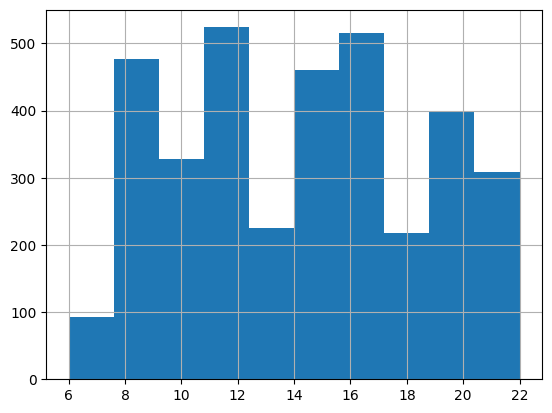

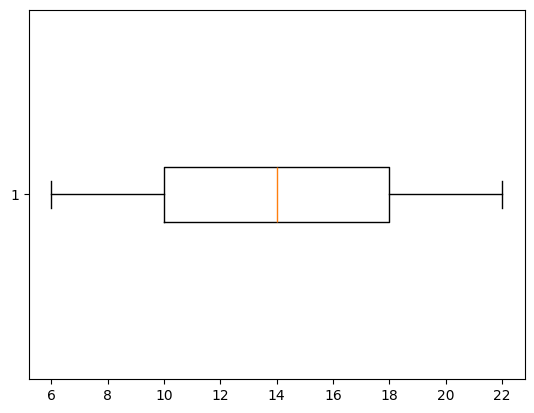

<Figure size 640x480 with 0 Axes>

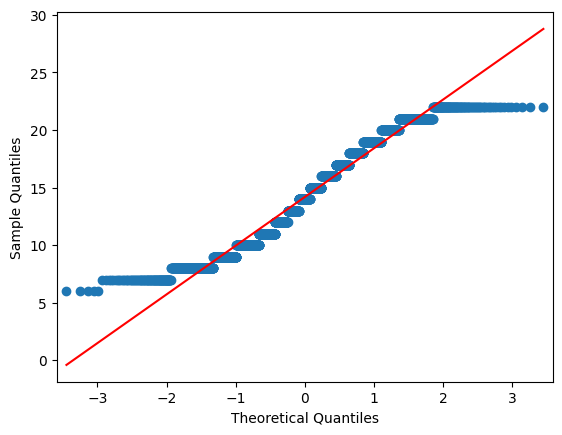

In [23]:
# Histograma para hour_of_day
data['hour_of_day'].hist()
# Boxplot
plt.figure()
plt.boxplot(data['hour_of_day'], vert=False)
plt.show()
# QQ-plot
plt.figure()
qqplot(data['hour_of_day'], line='s')
plt.show()

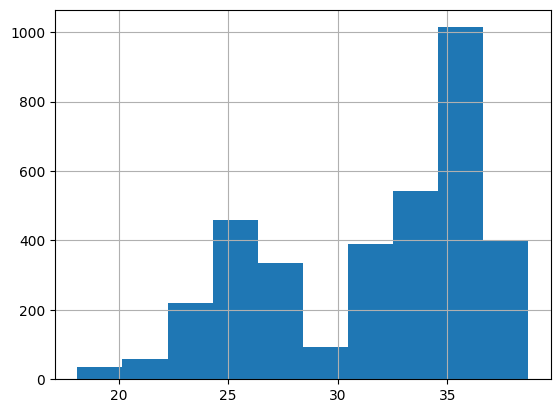

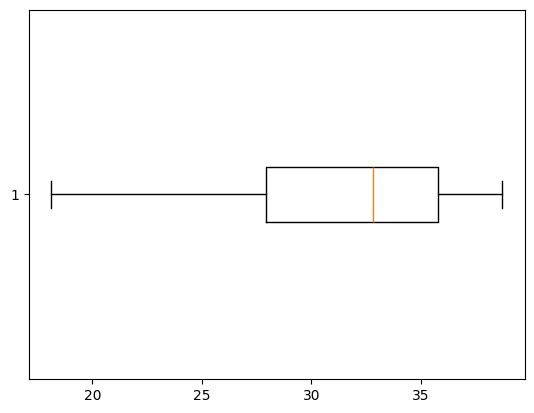

<Figure size 640x480 with 0 Axes>

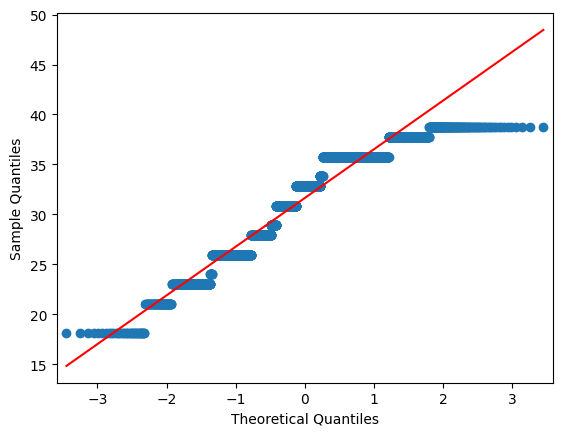

In [25]:
# Histograma para money
data['money'].hist()
# Boxplot
plt.figure()
plt.boxplot(data['money'], vert=False)
plt.show()
# QQ-plot
plt.figure()
qqplot(data['money'], line='s')
plt.show()

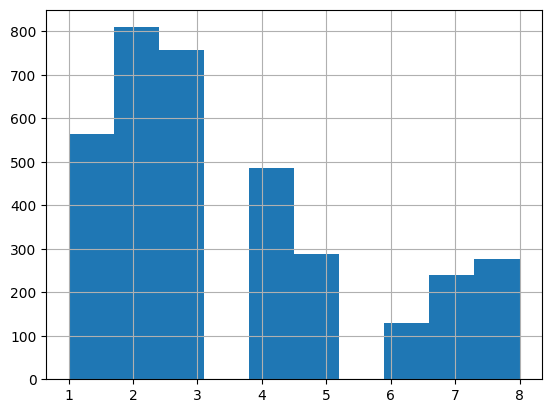

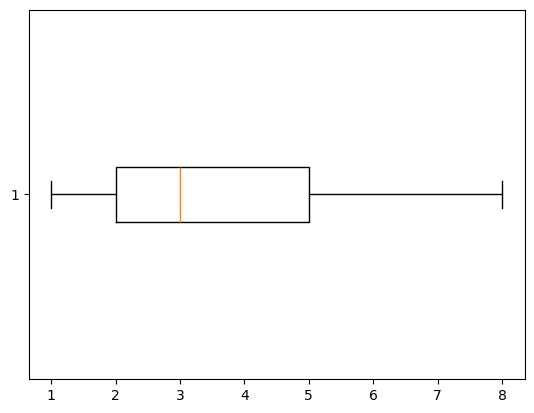

<Figure size 640x480 with 0 Axes>

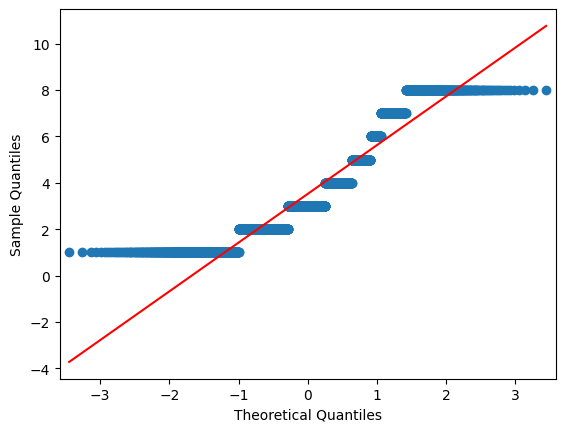

In [26]:
# Histograma para coffee_ordered
data['coffee_ordered'].hist()
# Boxplot
plt.figure()
plt.boxplot(data['coffee_ordered'], vert=False)
plt.show()
# QQ-plot
plt.figure()
qqplot(data['coffee_ordered'], line='s')
plt.show()

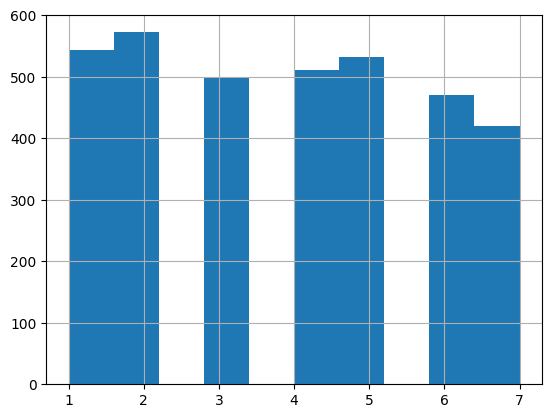

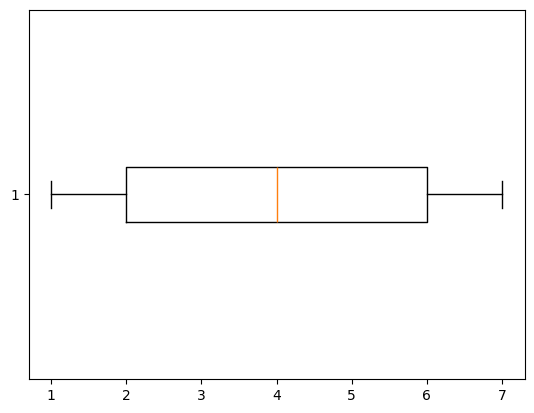

<Figure size 640x480 with 0 Axes>

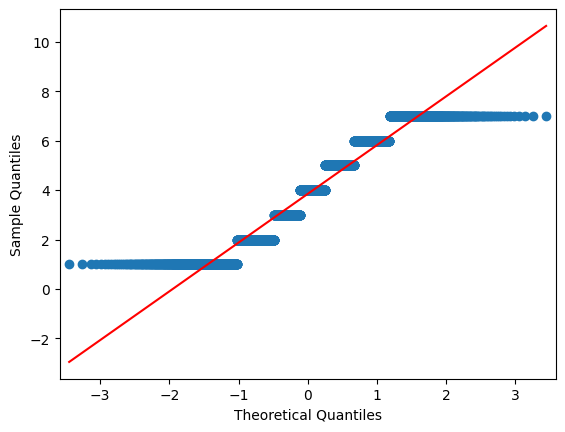

In [27]:
# Histograma de Weekdaysort
data['Weekdaysort'].hist()
# Boxplot
plt.figure()
plt.boxplot(data['Weekdaysort'], vert=False)
plt.show()
# QQ-plot
plt.figure()
qqplot(data['Weekdaysort'], line='s')
plt.show()

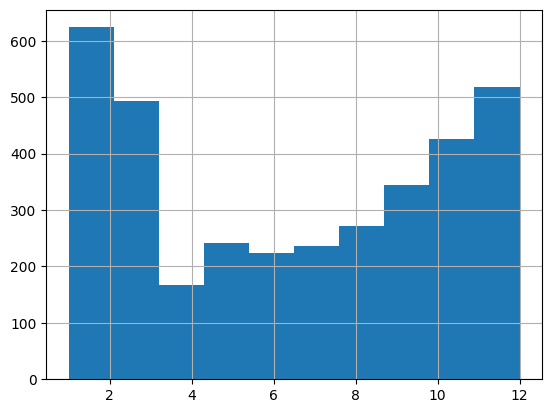

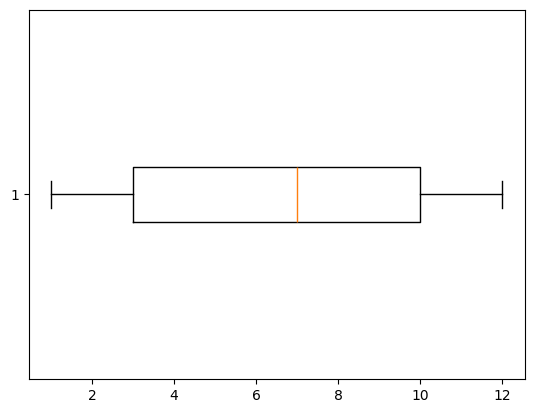

<Figure size 640x480 with 0 Axes>

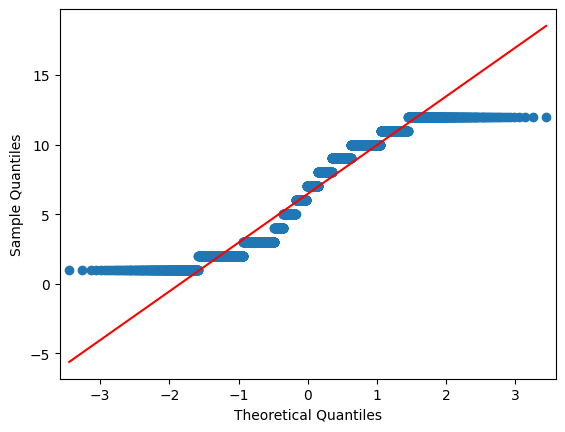

In [28]:
# Histograma de Monthsort
data['Monthsort'].hist()
# Boxplot
plt.figure()
plt.boxplot(data['Monthsort'], vert=False)
plt.show()
# QQ-plot
plt.figure()
qqplot(data['Monthsort'], line='s')
plt.show()

Como se pudó apreciar, las gráficas parecen indicar que ninguna de las variables tiene datos que provienen de una distribución normal, al todos presentar histogramas que no siguen dicha distribución, colas muy notorias en el qq-plot y medias no centradas en el boxplot.

## Estadísticos descriptivos (básicos)

In [31]:
# De aquí obtenemos la media, la desviación estándar y los cuartiles
data.describe()

,hour_of_day,money,coffee_ordered,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.00000,3547.000000,3547.000000
mean,14.185791,31.645216,3.52044,3.845785,6.453905
std,4.234010,4.877754,2.09902,1.971501,3.500754
min,6.000000,18.120000,1.00000,1.000000,1.000000
25%,10.000000,27.920000,2.00000,2.000000,3.000000
50%,14.000000,32.820000,3.00000,4.000000,7.000000
75%,18.000000,35.760000,5.00000,6.000000,10.000000
max,22.000000,38.700000,8.00000,7.000000,12.000000


In [35]:
# Varianzas
data.var()

,0
hour_of_day,17.926837
money,23.792481
coffee_ordered,4.405885
Weekdaysort,3.886815
Monthsort,12.255277


In [37]:
# Moda
data.mode()

,hour_of_day,money,coffee_ordered,Weekdaysort,Monthsort
0,10,35.76,2,2,3


In [38]:
# Mediana
data.median()

,0
hour_of_day,14.00
money,32.82
coffee_ordered,3.00
Weekdaysort,4.00
Monthsort,7.00


## Matriz de correlación

In [39]:
df_corr = data.corr()
df_corr

,hour_of_day,money,coffee_ordered,Weekdaysort,Monthsort
hour_of_day,1.000000,0.202748,0.152694,-0.002614,0.008293
money,0.202748,1.000000,0.318488,-0.017264,-0.050043
coffee_ordered,0.152694,0.318488,1.000000,0.029963,0.078180
Weekdaysort,-0.002614,-0.017264,0.029963,1.000000,0.044141
Monthsort,0.008293,-0.050043,0.078180,0.044141,1.000000


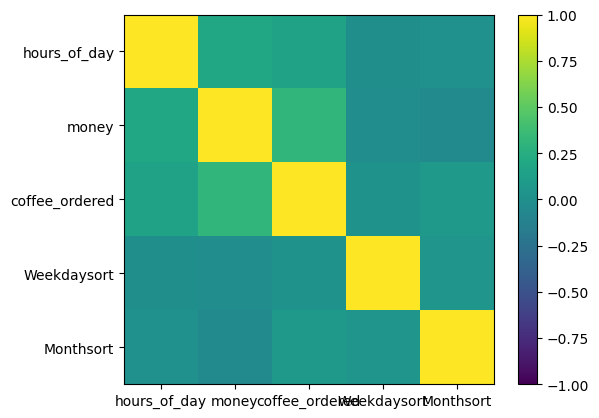

In [55]:
plt.figure()
plt.imshow(df_corr)

plt.xticks([0, 1, 2, 3, 4],  labels = ['hours_of_day', 'money', 'coffee_ordered', 'Weekdaysort', 'Monthsort'])
plt.yticks([0, 1, 2, 3, 4],  labels = ['hours_of_day', 'money', 'coffee_ordered', 'Weekdaysort', 'Monthsort'])

plt.clim(vmin = -1)
plt.colorbar()
plt.show()

### Interpretación
Se puede interpretar que las correlaciones más notables se encuentran entre `hour_of_day`, `money`, y `coffee_ordered`, lo que sugiere que la hora del día tiene alguna influencia en las ventas y la cantidad de cafés pedidos. Las variables `Weekdaysort` y `Monthsort` parecen tener poca o ninguna relación lineal con las otras variables.

## Prueba de hipótesis

Se plantea de la interpretación previa la siguiente hipótesis:

H0: `hour_of_day` y `money` no están relacionadas linealmente

H1: `hour_of_day` y `money` si están relacionadas linealmente

Alpha: 0.05

In [63]:
from scipy.stats import pearsonr

# Prueba de hipótesis para la correlación entre 'money' y 'hour_of_day'
corr, p_value = pearsonr(data['money'], data['hour_of_day'])

print(f"Coeficiente de correlación de Pearson: {corr}")
print(f"P-valor: {p_value}")

Coeficiente de correlación de Pearson: 0.2027479351427611
P-valor: 3.199945502210123e-34


Dados los resultados podemos comentar que existe evidencia para decir que existe una correlación lineal entre `money` y `hour_of_day`, aunque dado el valor del coeficiente de Pearson, no es muy significativo.

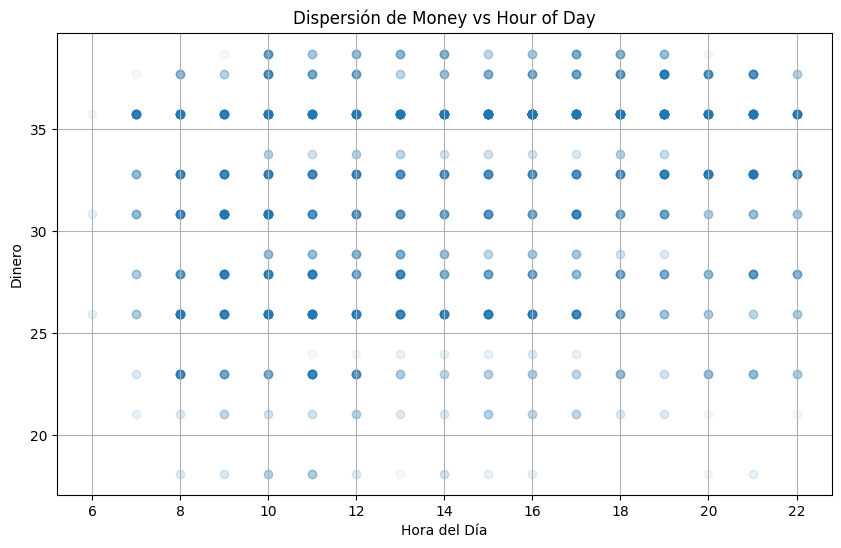

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(data['hour_of_day'], data['money'], alpha=0.05)
plt.title('Dispersión de Money vs Hour of Day')
plt.xlabel('Hora del Día')
plt.ylabel('Dinero')
plt.grid(True)
plt.show()

Con el gráfico anterior podemos ver que, aunque muy pequeña, se logra apreciar una cierta tendencia entre las variables, donde a medida que avanza el día, el dinero también aumenta.